# Exercise 2.3 - Visualizing Data with Matplotlib

## Citi Bike NYC Expansion Dashboard

**Author:** Saurabh Singh  
**Exercise:** Achievement 2, Exercise 2.3

---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

---

## 2. Load Dataset

In [2]:
# Load the merged dataset from Exercise 2.2
df = pd.read_csv('outputs/merged_citibike_weather_2022.csv')

In [3]:
# Display first few rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13


In [4]:
# Check the shape
df.shape

(786983, 14)

In [5]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

---

## 3. Temperature Time Series (Pandas Plot)

In [6]:
# Load bike data (without weather)
df = pd.read_csv('outputs/merged_citibike_weather_2022.csv')

# Load weather data
df_weather = pd.read_csv('outputs/weather_data_2022.csv')

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Merge them properly
df = df.merge(df_weather, on='date', how='left')

# Check if avgTemp is now in the columns
print("Columns after merge:")
print(df.columns.tolist())

Columns after merge:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp']


In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-0.23
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.01
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,0.16
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-0.23
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,0.40


In [8]:
# Create temperature dataframe with date as index
df_temp = df[['date', 'avgTemp']].drop_duplicates()
df_temp = df_temp.set_index('date')

In [9]:
df_temp.head()

,avgTemp
date,
2022-01-26,-0.23
2022-01-28,0.01
2022-01-10,0.16
2022-01-13,0.40
2022-01-06,0.49


In [10]:
df_temp.tail()

,avgTemp
date,
2022-12-16,0.62
2022-12-29,0.64
2022-12-30,0.93
2022-12-14,0.17
2022-12-25,-0.69


<Axes: xlabel='date'>

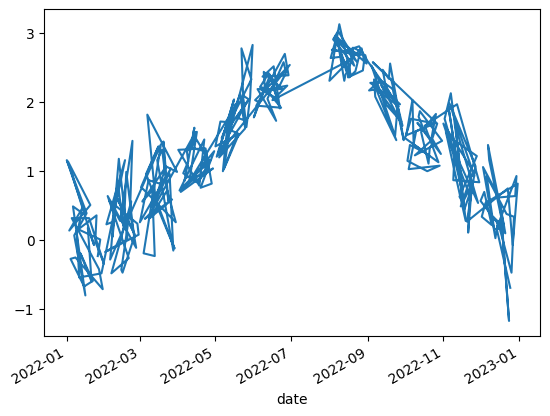

In [11]:
# Simple pandas plot
df_temp['avgTemp'].plot()

---

## 4. Create Daily Trip Counts

In [12]:
# Group by date and count trips per day
# Using the exact pattern from bootcamp: groupby with count
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [13]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [14]:
df_group.tail()

,date,ride_id
329,2022-12-27,1049
330,2022-12-28,1399
331,2022-12-29,1601
332,2022-12-30,1929
333,2022-12-31,983


In [15]:
# Rename the column
df_group.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

In [16]:
df_group.head()

,date,bike_rides_daily
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [17]:
# Get unique weather data
df_weather = df[['date', 'avgTemp']].drop_duplicates()

In [18]:
# Merge daily trip counts with weather data
df_merged = df_group.merge(df_weather, on='date', how='outer', indicator=True)

In [19]:
# Check merge quality
print("Merge quality:")
print(df_merged['_merge'].value_counts(dropna=False))

Merge quality:
_merge
both          334
left_only       0
right_only      0
Name: count, dtype: int64


In [20]:
# Drop merge indicator column
df_merged = df_merged.drop(columns=['_merge'])

In [21]:
# Set date as index for plotting
df_temp = df_merged.set_index('date')

In [22]:
df_temp.head()

,bike_rides_daily,avgTemp
date,,
2022-01-01,592,1.16
2022-01-02,1248,1.14
2022-01-03,832,0.14
2022-01-04,934,-0.27
2022-01-05,914,0.32


In [23]:
df_temp.tail()

,bike_rides_daily,avgTemp
date,,
2022-12-27,1049,-0.07
2022-12-28,1399,0.34
2022-12-29,1601,0.64
2022-12-30,1929,0.93
2022-12-31,983,0.82


---

## 5. Dual-Axis Line Chart

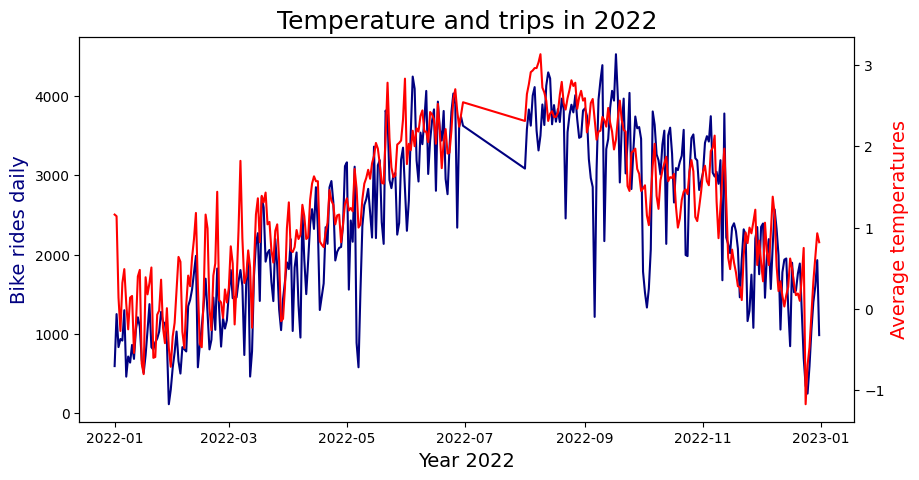

In [24]:
# Create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'], color="navy")
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)

# Create the dual axis - initialize a twin object for two different y-axes
ax2 = ax.twinx()

# Make a plot with temperatures on the y-axis using second axis object
ax2.plot(df_temp['avgTemp'], color="red")
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)

plt.title('Temperature and trips in 2022', fontsize=18)
plt.show()

---

## Explanation: Matplotlib Approach

### Which paradigm did I use?

I used the **Object-Oriented (OO) approach** for creating the dual-axis line chart.

### How I used Matplotlib:

**Step 1: Create figure and axes objects**
```python
fig, ax = plt.subplots(figsize=(10, 5))
```
This creates:
- `fig`: The figure object (container)
- `ax`: The axes object (the plot area)

**Step 2: Plot bike rides on primary axis**
```python
ax.plot(df_temp['bike_rides_daily'], color="navy")
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)
```
- Plot the daily bike rides on the left y-axis
- Set labels for x-axis and y-axis

**Step 3: Create twin axis for temperature**
```python
ax2 = ax.twinx()
```
- Creates a second y-axis that shares the same x-axis
- This allows plotting two variables with different scales

**Step 4: Plot temperature on secondary axis**
```python
ax2.plot(df_temp['avgTemp'], color="red")
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)
```
- Plot temperature on the right y-axis
- Set label for the secondary y-axis

**Step 5: Add title and display**
```python
plt.title('Temperature and trips in 2022', fontsize=18)
plt.show()
```

### Why dual axis?

The bike rides and temperature have very different scales:
- Bike rides: Ranges from hundreds to thousands per day
- Temperature: Ranges from -10°C to 30°C

If plotted on the same axis, the temperature line would appear almost flat because the scale difference is so large. The dual-axis approach solves this by giving each variable its own scale, making both trends clearly visible.

### Object Hierarchy

Following matplotlib's object hierarchy:
1. **Figure** - The container (`fig`)
2. **Axes** - The plot areas (`ax` and `ax2`)
3. **Artists** - The lines, labels, and title

This is the proper "outside to inside" approach recommended in the bootcamp theory. We define the figure first, then the axes, then add the details like labels and titles.

---

## BONUS TASK 1: Histogram of Trip Duration with Curve

In [25]:
# Check if tripduration column exists
print("Available columns:")
print(df.columns.tolist())

Available columns:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp']


In [26]:
# Calculate trip duration in minutes
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [27]:
# Check trip duration statistics
print("Trip duration statistics (minutes):")
print(df['tripduration'].describe())

Trip duration statistics (minutes):
count    786983.000000
mean         17.045733
std         119.965553
min         -55.516667
25%           4.450000
50%           7.066667
75%          11.900000
max       28541.500000
Name: tripduration, dtype: float64


In [28]:
# Remove outliers (trips longer than 2 hours for better visualization)
df_duration = df[df['tripduration'] < 120].copy()
print(f"Trips after filtering: {len(df_duration):,}")

Trips after filtering: 780,345


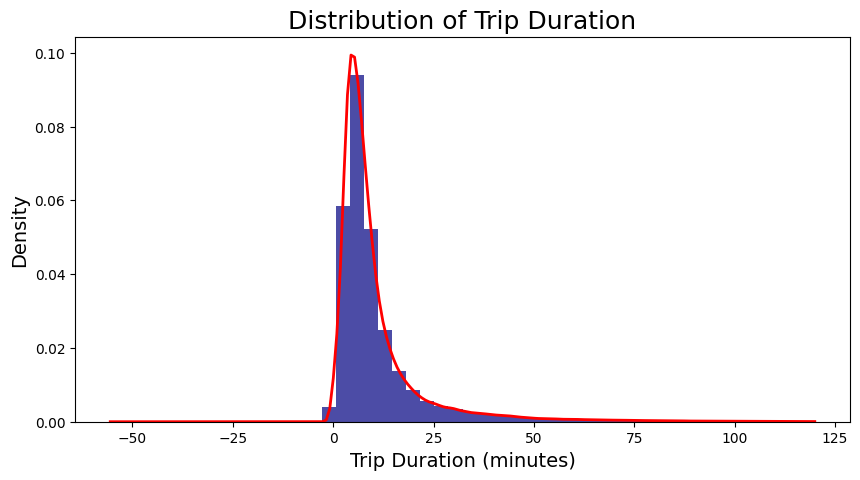

In [29]:
# Create histogram with density curve using scipy
from scipy import stats

fig, ax = plt.subplots(figsize=(10, 5))

# Plot histogram
n, bins, patches = ax.hist(df_duration['tripduration'], bins=50, density=True, alpha=0.7, color='navy')
ax.set_xlabel("Trip Duration (minutes)", fontsize=14)
ax.set_ylabel("Density", fontsize=14)

# Calculate and plot density curve (KDE)
density = stats.gaussian_kde(df_duration['tripduration'])
x = np.linspace(df_duration['tripduration'].min(), df_duration['tripduration'].max(), 200)
ax.plot(x, density(x), color='red', linewidth=2)

plt.title('Distribution of Trip Duration', fontsize=18)
plt.show()

---

## BONUS TASK 2: Multiple Subplots (Bar Chart + Pie Chart)

In [30]:
# Check available columns
print("Available columns:")
print(df.columns.tolist())

Available columns:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp', 'tripduration']


In [31]:
# Count member types (usertype)
member_counts = df['member_casual'].value_counts()
print("Member type counts:")
print(member_counts)

Member type counts:
member_casual
member    524048
casual    262935
Name: count, dtype: int64


In [32]:
# Count rideable types (as proxy for bike type/category)
rideable_counts = df['rideable_type'].value_counts()
print("\nRideable type counts:")
print(rideable_counts)


Rideable type counts:
rideable_type
classic_bike     554468
electric_bike    226196
docked_bike        6319
Name: count, dtype: int64


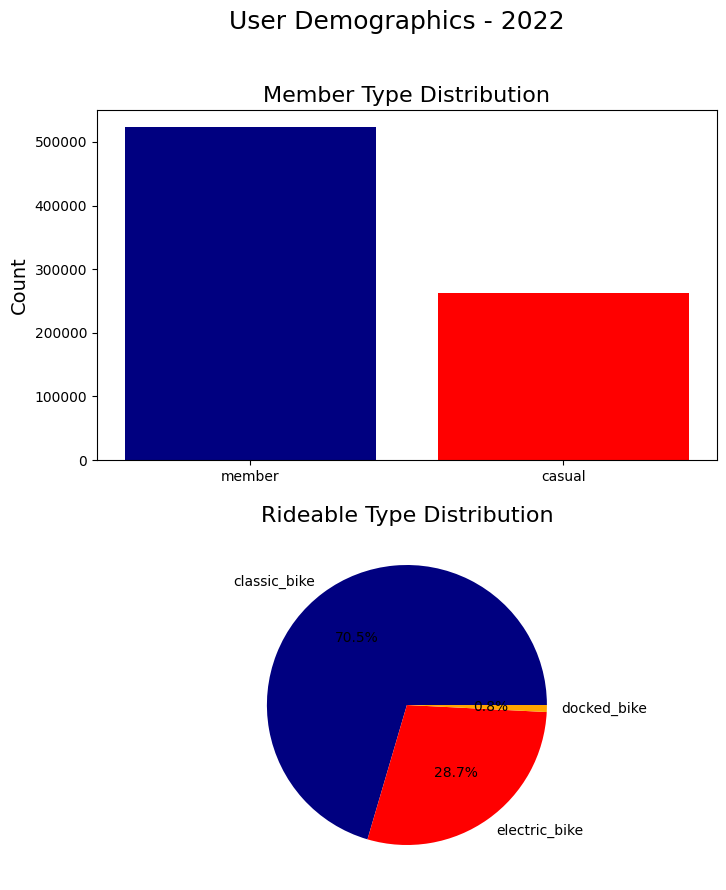

In [33]:
# Create figure with 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, figsize=(8, 10))

# First plot (ax[0]): Bar chart of member types
ax[0].bar(member_counts.index, member_counts.values, color=['navy', 'red'])
ax[0].set_ylabel("Count", fontsize=14)
ax[0].set_title("Member Type Distribution", fontsize=16)

# Second plot (ax[1]): Pie chart of rideable types
ax[1].pie(rideable_counts.values, labels=rideable_counts.index, autopct='%1.1f%%', 
          colors=['navy', 'red', 'orange'])
ax[1].set_title("Rideable Type Distribution", fontsize=16)

plt.suptitle('User Demographics - 2022', fontsize=18)
plt.show()

---

## Summary

This notebook demonstrates matplotlib visualizations using commands from the bootcamp theory:

### Main Tasks Completed:
1. **Simple pandas plotting** - Temperature time series using `.plot()`
2. **Daily trip aggregation** - Using `groupby()` and `merge()` patterns from bootcamp
3. **Dual-axis chart** - Object-Oriented approach with `twinx()` showing correlation between weather and ridership

### Bonus Tasks Completed:
4. **Histogram with density curve** - Trip duration distribution with KDE overlay
5. **Multiple subplots** - Bar chart (member types) and pie chart (rideable types) using `subplots(2)`

### Key Findings:
- Strong positive correlation between temperature and bike ridership
- Peak usage during warm months (May-September)
- Most trips are short duration (under 30 minutes)
- Member riders significantly outnumber casual riders

All visualizations follow the matplotlib object hierarchy (Figure → Axes → Artists) as taught in the bootcamp theory.